# 🧠 Data Exploration Notebook

This notebook is the **first step** in a full machine learning pipeline designed to predict whether a diabetic patient will be readmitted to the hospital **within 30 days** of discharge.

Hospital readmissions are a major clinical and financial concern—early identification of high-risk patients can:
- Enable timely medical intervention
- Improve patient outcomes
- Reduce healthcare costs

---

#### 🎯 Project Objective

To build a machine learning model that:
- Predicts **30-day readmission** using structured hospital visit data
- Provides **explainable predictions** using techniques like **SHAP**
- Simulates a **real-world ML workflow** used in clinical settings

---

#### 📍 What This Notebook Covers

In this notebook, we will:
- Load and inspect the dataset
- Understand feature types (categorical, numerical, identifiers)
- Analyze the **target variable** (`readmitted`) and define our classification task
- Identify potential data quality issues (e.g. missing values, imbalance)
- Summarize observations that will inform preprocessing and modeling in later steps

---

➡️ This sets the foundation for the rest of the pipeline, including:
- `02_preprocessing_and_feature_engineering.ipynb`
- `03_model_training_and_evaluation.ipynb`
- `04_model_explainability.ipynb`



## 📊 Exploring the Fundamentals of the Data

In this section, we begin by importing the dataset and performing an initial review to understand its structure and contents.

The goal here is to:
- Get a sense of the dataset's **size and shape**
- Examine **column types** and identify **feature categories** (numerical, categorical, identifiers, etc.)
- Review the **target variable** (`readmitted`) and how we will frame the prediction task
- Identify any obvious issues, such as duplicate identifiers or unusable columns

This exploration lays the groundwork for more detailed analysis and data preparation in the next stages.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the plot style
sns.set(style='whitegrid')


In [28]:
df = pd.read_csv('../data/diabetic_data.csv')
df.head(10)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Observations of the data
The main goal of this project is to predict whether a diabetic patient will be readmitted to the hospital within 30 days of discharge. With this objective in mind, we begin by examining and understanding the structure of the dataset to identify patterns and potential predictors of readmission.

The dataset contains both numerical (e.g., number of medications, time in hospital) and categorical (e.g., race, gender, diagnosis codes) features. In total, there are 50 columns (features) and 101,766 rows, where each row represents a single hospital visit by a patient. It’s important to note that the same patient may appear multiple times, as the dataset logs individual encounters rather than unique individuals.

Furthermore, which will be important in the second part, we have a lot of values in the data that are marked as '?', which is probably a string value. These are in addition to NaN values, concidered missing values and needs to be taken into account. 


/var/folders/r2/rqs61_c910v1q6v3_ddh20rr0000gn/T/ipykernel_96029/33173601.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='readmitted', data=df, palette='pastel', order=['<30', '>30', 'NO'])


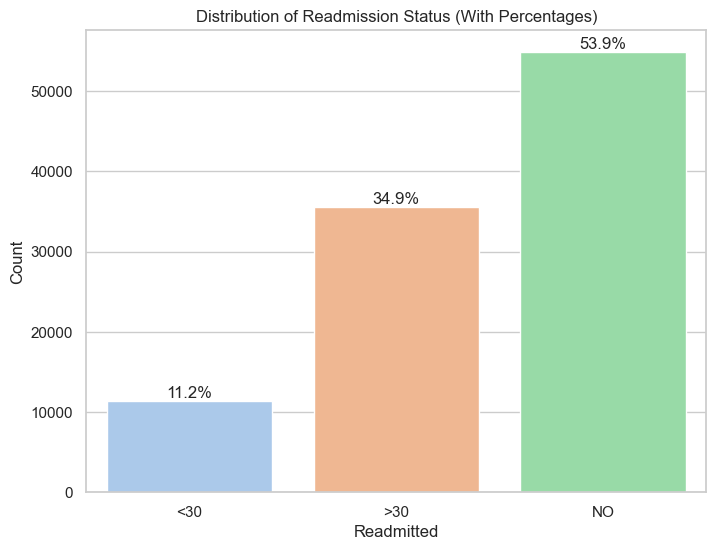

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [30]:
# Visualizing the distribution of the 'readmitted' column (target variable)
plt.figure(figsize=(8,6))
ax = sns.countplot(x='readmitted', data=df, palette='pastel', order=['<30', '>30', 'NO'])

# Add percentage labels on top of bars
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Distribution of Readmission Status (With Percentages)')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.show()


df['readmitted'].value_counts()

### Observations on Target Variable (`readmitted`)

The target variable contains three classes:

- `<30`: Readmitted within 30 days (11.2%)
- `>30`: Readmitted after 30 days (34.9%)
- `NO`: Not readmitted (53.9%)

However, since we are only interested in wheter the patient was re-admittes within 30 days or not we can remake this into a binary classification, where we simply merge those who have not been re-admitted at all with those who were re-admitted after 30 days. This results in the following binary class. 

- `<30`: Readmitted within 30 days (11.2%)
- `>30 || NO`: Readmitted after 30 days (88.8%)

Thus it is evident that the data is very **imbalanced**. This is important to acknowledge early because it can lead to very biased models, that is a model that achieves high accuracy of predicition without actually learning anything useful. In order to prevent this we will need to: 

- Use evaluation metrics that are better suited for imbalanced data such as **F1-score**, **precision/recall**, and **ROC-AUC** instead of just accuracy (even though accuracy is rarley a good metric).
- Concider different techniques during model training such as **Class weighting**, **Oversampling** or **Undersampling**, depending on the model.
- Be careful durin **train-test splitting** to avoid an unbalanced class distribution.

So in summary, we will treat this as a binary classification problem and only focus on predicitng wheter the patient will be re-admitted within 30 days **or not**. Since the positive class is underrepresented, strategies to combat this will need to be concidered.


/var/folders/r2/rqs61_c910v1q6v3_ddh20rr0000gn/T/ipykernel_96029/427610618.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=binary_target, palette='pastel')


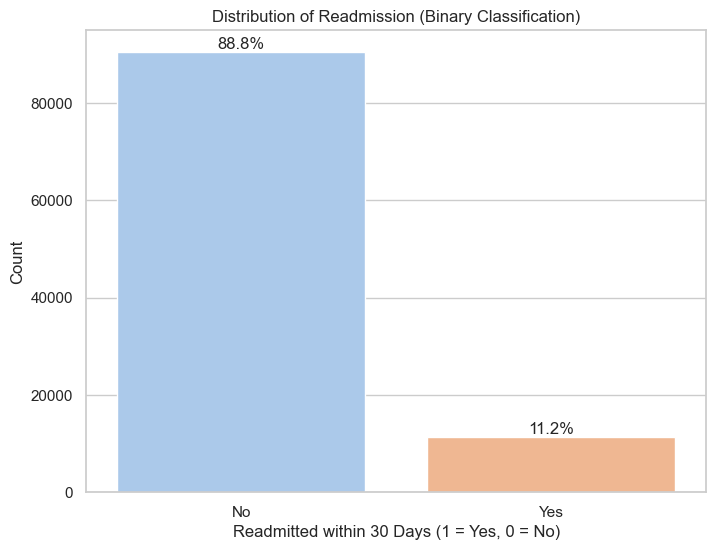

In [39]:
# Visualizing the binary distribution of the 'readmitted' column, after mergin.
# Create a temporary Series to represent the binary version of 'readmitted'
binary_target = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Plot the distribution
plt.figure(figsize=(8,6))
ax = sns.countplot(x=binary_target, palette='pastel')

# Add percentage labels
total = len(binary_target)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Distribution of Readmission (Binary Classification)')
plt.xlabel('Readmitted within 30 Days (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  # Optional: label the x-axis
plt.show()


## 🧼 Exploring Missing Values, Distributions, and Correlations

In this section, we take a deeper look at data quality and variable behavior, with a focus on identifying challenges and opportunities for modeling.

Specifically, we will:
- Detect and quantify **missing or placeholder values** (e.g., `'?'`,`'NaN'`, etc  )
- Examine **categorical feature distributions** to spot class imbalance or inconsistent values
- Analyze **numerical feature distributions** for skewness, outliers, or sparsity
- Explore basic **correlations** between numeric variables to identify redundancy or relationships

These insights will inform our decisions in the preprocessing and feature engineering steps that follow.


#### Checking for NaN and missing values ('?')

In [40]:
# Check for NaN values
NaN_counts = df.isnull().sum().sort_values(ascending=False)
print("🔍 Missing (NaN) Values:")
display(NaN_counts[NaN_counts > 0])

# Check for '?' values
question_mark_counts = (df == '?').sum().sort_values(ascending=False)
print("\n🔍 Placeholder '?' Values:")
display(question_mark_counts[question_mark_counts > 0])


🔍 Missing (NaN) Values:


max_glu_serum    96420
A1Cresult        84748
dtype: int64


🔍 Placeholder '?' Values:


weight               98569
medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
dtype: int64

### Cathegorical Data

#### Finding the cathegorical data 

In [72]:
categorical_features = df.select_dtypes(include='object').columns.tolist()

print('Total number of cathegorical features: ', len(categorical_features))
df[categorical_features].head(10)


Total number of cathegorical features:  37


,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,?,Pediatrics-Endocrinology,250.83,?,?,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,?,?,276,250.01,255,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,?,?,648,250,V27,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,?,?,8,250.43,403,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,?,?,197,157,250,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),?,?,?,414,411,250,NaN,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),?,?,?,414,411,V45,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),?,?,?,428,492,250,NaN,...,No,No,No,No,No,No,No,No,Yes,>30
8,Caucasian,Female,[80-90),?,?,?,398,427,38,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Caucasian,Female,[90-100),?,?,InternalMedicine,434,198,486,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### Observations of the cathegorical data 
Here, we can see that there are some binary cathegorical data, some data with loads of different cathegorical values and some that have a lot of missing values. In order to be able to explore all of these the tactic will be to partition these into three subsets such that:

1. Those cathegories that has a high number of missing values will be partitioned together into the same subset. This is made in order to not waste time on these as they will not result in much inforamtion when exploring.
2. Cathegories that are purley **binary**.
3. Cathegories that have a few different values, between 3-10 different values. 
4. The rest will fit here, which would be those that have more than 10 different cathegorical values but with low missing data. 

In the next section this will be done explicitly.  


### Partitioning the Cathegorical Data into Subsets Based on the Observations

#### Partitioning cathegorical data with high number of missing values 

In [74]:
# Copying the original DataFrame to avoid modifying it and adding only cathegorical data
df_copy = df.copy()
df_cathegory = df_copy[categorical_features].copy()

# Replacing '?' with NaN
df_cathegory.replace('?', pd.NA, inplace=True)

# Check for NaN values in the cathegorical data 
df_cathegory.isnull().sum().sort_values(ascending=False)

# Setting a threshold for partitioning, at 35% NaN values of the total feature
NaN_threshold = 0.35 * len(df_cathegory)

# Creating a subset with features that have a greater NaN value than the threshold 
df_missing_values = df_cathegory.loc[:, df_cathegory.isnull().sum() > NaN_threshold]
print("Number of features with NaN values greater than the threshold: ", len(df_missing_values.columns))
df_missing_values.head(10)

Number of features with NaN values greater than the threshold:  5


,weight,payer_code,medical_specialty,max_glu_serum,A1Cresult
0,<NA>,<NA>,Pediatrics-Endocrinology,NaN,NaN
1,<NA>,<NA>,<NA>,NaN,NaN
2,<NA>,<NA>,<NA>,NaN,NaN
3,<NA>,<NA>,<NA>,NaN,NaN
4,<NA>,<NA>,<NA>,NaN,NaN
5,<NA>,<NA>,<NA>,NaN,NaN
6,<NA>,<NA>,<NA>,NaN,NaN
7,<NA>,<NA>,<NA>,NaN,NaN
8,<NA>,<NA>,<NA>,NaN,NaN
9,<NA>,<NA>,InternalMedicine,NaN,NaN


#### Partitioning Binary Data

In [94]:
# Making another copy for the binary category subset. 
df_binary = df_copy[categorical_features].copy()

# Get column names with < 3 unique values (i.e., binary)
binary_cols = df_binary.nunique()[df_binary.nunique() == 2].index

# Subset those columns
df_binary = df_binary[binary_cols].copy()

df_binary.nunique()

acetohexamide               2
tolbutamide                 2
troglitazone                2
glipizide-metformin         2
glimepiride-pioglitazone    2
metformin-rosiglitazone     2
metformin-pioglitazone      2
change                      2
diabetesMed                 2
dtype: int64

#### Partitioning Categoriacal Data with classes in the range [3, 10]

In [101]:
# Again copying the original DataFrame to avoid accidental modification. 
df_low_cardinality = df_copy[categorical_features].copy()

# Selecting categorical features with 3 to 10 unique values (i.e., low cardinality, not binary)
df_low_cardinality = df_low_cardinality.loc[:, df_low_cardinality.nunique().between(3, 10)]

df_low_cardinality.nunique()


race                    6
gender                  3
age                    10
weight                 10
max_glu_serum           3
A1Cresult               3
metformin               4
repaglinide             4
nateglinide             4
chlorpropamide          4
glimepiride             4
glipizide               4
glyburide               4
pioglitazone            4
rosiglitazone           4
acarbose                4
miglitol                4
tolazamide              3
insulin                 4
glyburide-metformin     4
readmitted              3
dtype: int64

#### Partitioning Categoriacal Data with feature that has more than 10 classes.

In [102]:
df_high_cardinality = df_copy[categorical_features].copy()

# Selecting categorical features with more than 10 unique classes (i.e., high cardinality)
df_high_cardinality = df_high_cardinality.loc[:, df_high_cardinality.nunique() > 10]

df_high_cardinality.nunique()


payer_code            18
medical_specialty     73
diag_1               717
diag_2               749
diag_3               790
dtype: int64

#### Exploring the Categorical Data 
Now that we have partitioned the categorical data, we can explore it better. The reason this is done is to know exactly which of the features are suitable for the later parts of this pipeline. That is, the categorical features will be cheked for:

1. Class imbalances
2. Constant or low variance
3. High cardinality - Makes it expensive to encode and risk for overfitting. 
4. Placeholder values 
5. Redundancy 
6. Suspicious value counts
7. Missing value / wierd values (altough this is pretty much done) 

Understanding these characteristics allows us to make informed decisions in the preprocessing phase. The goal is to retain meaningful information while reducing noise and unnecessary complexity — improving both model performance and efficiency. This part serves to explore the categorical data. 

In [104]:
print("Woops nothing here yet. Move along.")

Woops nothing here yet. Move along.
